In [58]:
import numpy as np
import netCDF4

from scipy import (special, signal, ndimage)
from scipy.ndimage import gaussian_filter

from ipywidgets import (interact)
import os

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.rcParams['figure.figsize'] = (25, 10)

path = "/mnt/Knolselderij/bulk/Abrupt/"
fn1 = "tas_Amon_MPI-ESM-LR_rcp85_r1i1p1_200601-210012.nc"
fn2 = "tas_Amon_MPI-ESM-LR_rcp85_r1i1p1_210101-230012.nc"

In [59]:
def get_data(filename):
    return netCDF4.Dataset(filename, 'r', format='NETCDF4')

In [60]:
data = get_data(path + fn1)
tas = data.variables['tas'][0, :, :]
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]

In [61]:
def plot_orthographic_np(lats, lons, tas):
    tas = np.concatenate([tas[:,:], tas[:, 0:1]], axis=1)
    lons = np.concatenate([lons, lons[0:1]])
    lats = np.concatenate([lats, [90.0]])
    tas = np.concatenate([tas[:,:], tas[0:1,:]], axis=0)

    proj=ccrs.Orthographic(central_latitude=90)
    ax = plt.axes(projection=proj)
    plt.pcolormesh(
        lons, lats, tas,
        transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90))
    ax.coastlines()
    plt.colorbar()
    plt.show()

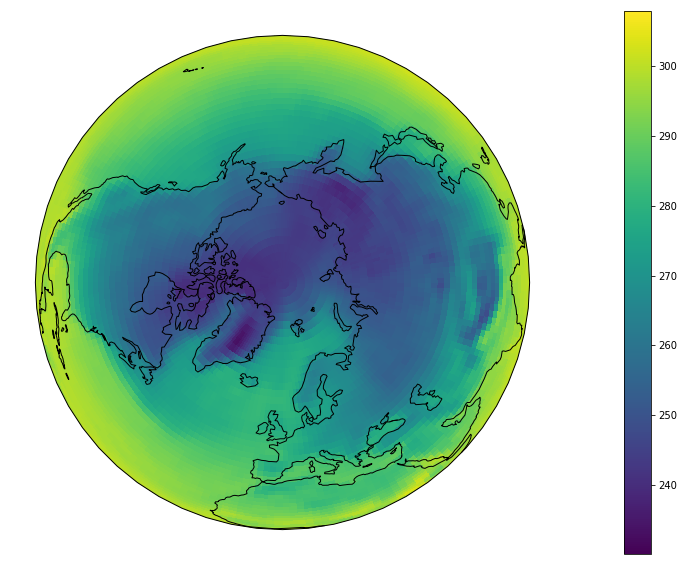

In [62]:
plot_orthographic_np(lats, lons, tas)

In [63]:
def plot_mollweide(lats, lons, tas):
    tas = np.concatenate([tas[:,:], tas[:, 0:1]], axis=1)
    lons = np.concatenate([lons, lons[0:1]])

    proj=ccrs.Mollweide()
    ax = plt.axes(projection=proj)
    plt.pcolormesh(
        lons, lats, tas,
        transform=ccrs.RotatedPole(pole_longitude=180, pole_latitude=90))
    ax.coastlines()
    plt.colorbar()
    plt.show()

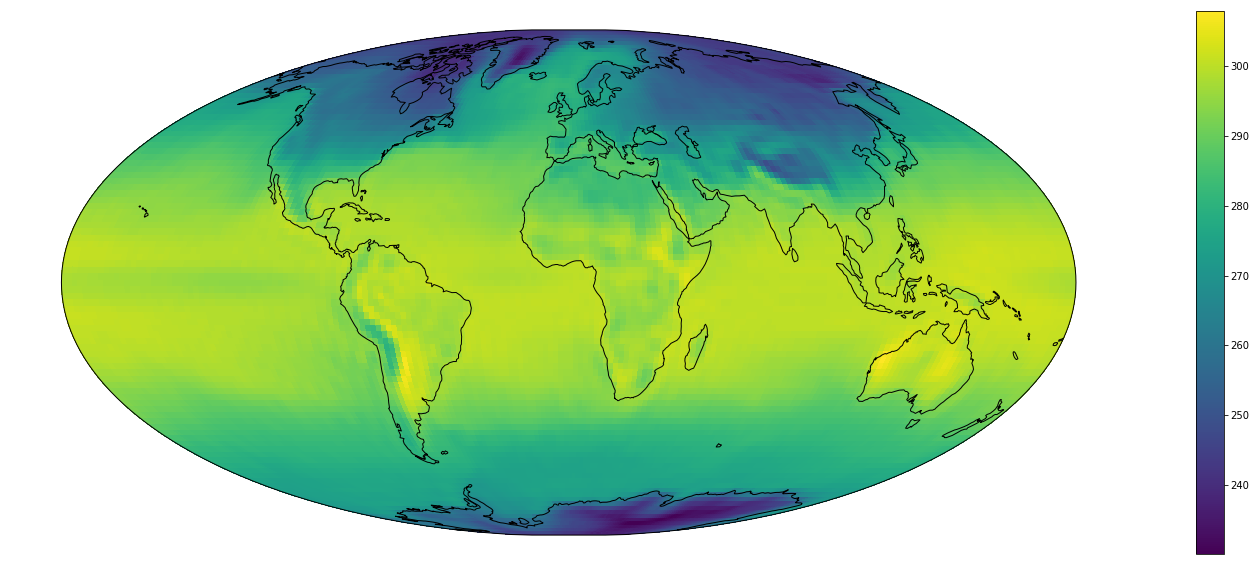

In [64]:
plot_mollweide(lats, lons, tas)

In [65]:
def plot_plate_carree(lats, lons, tas):
    tas = np.concatenate([tas[:,:], tas[:, 0:1]], axis=1)
    lons = np.concatenate([lons, lons[0:1]])

    proj=ccrs.PlateCarree()
    ax = plt.axes(projection=proj)
    plt.pcolormesh(
        lons, lats, tas,
        transform=ccrs.RotatedPole(pole_longitude=180, pole_latitude=90))
    ax.coastlines()
    plt.colorbar()
    plt.show()

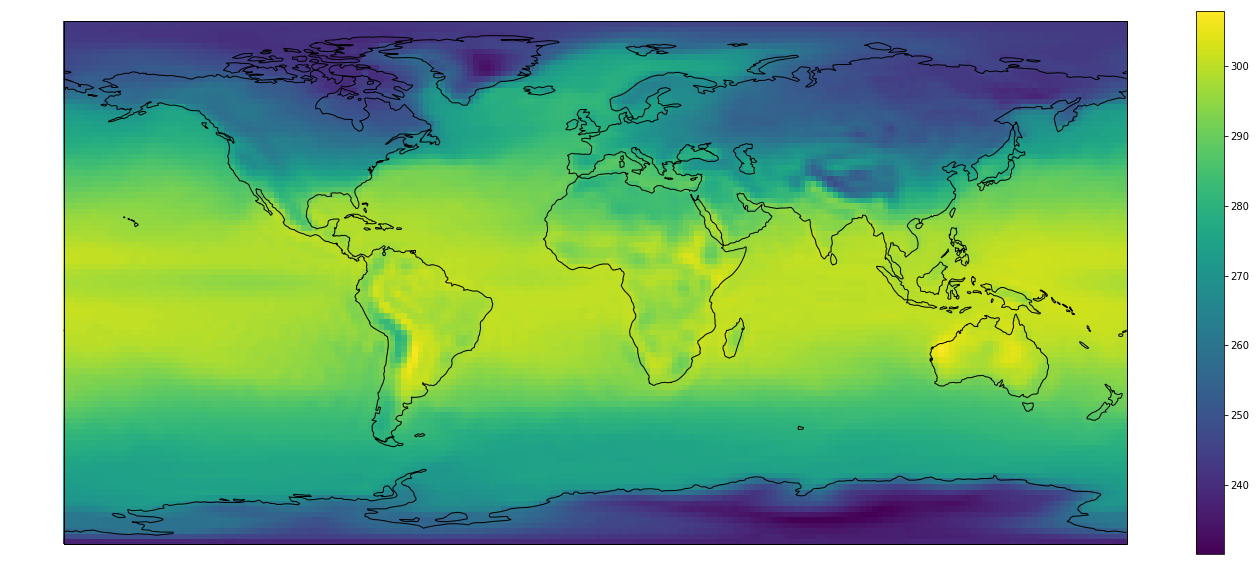

In [66]:
plot_plate_carree(lats, lons, tas)